In [1]:
# Set the notebook display method and libraries
# inline = embedded plots, notebook = interactive plots
%matplotlib notebook
import os
import matplotlib.pyplot as plt
import numpy as np 
from matplotlib import pyplot as plt
from plantcv import plantcv as pcv
from plotnine import ggplot, aes, geom_point
import pandas as pd

In [124]:
img_name = 'T03_GH13_JC01_Feb-09-2023_1528_rgb'

# give img location use "/" instead of "\"
path_img = f'C:/Users/jcard/OneDrive - University of Georgia/kinect_imaging/GH13_JC01/naives_segmentation/image_time/{img_name}.jpg'
path_rgb= 'C:/Users/jcard/OneDrive - University of Georgia/kinect_imaging/GH13_JC01/naives_segmentation/image_time/cut_images'
path_mask= 'C:/Users/jcard/OneDrive - University of Georgia/kinect_imaging/GH13_JC01/naives_segmentation/image_time/masks'

print(path_img)

C:/Users/jcard/OneDrive - University of Georgia/kinect_imaging/GH13_JC01/naives_segmentation/image_time/T03_GH13_JC01_Feb-09-2023_1528_rgb.jpg


<IPython.core.display.Javascript object>


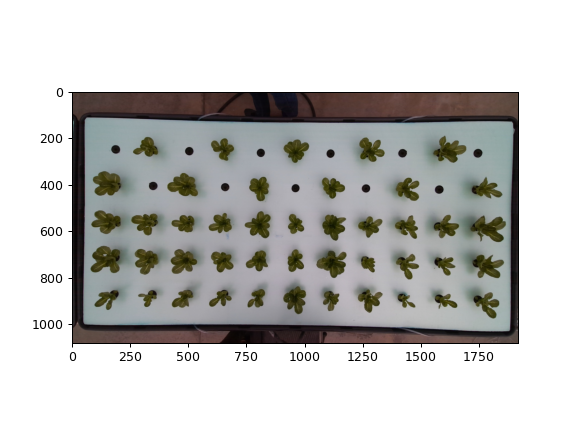

In [125]:
raw_img, path, img_filename = pcv.readimage(filename = path_img, mode="native")
pcv.plot_image(raw_img)


<IPython.core.display.Javascript object>


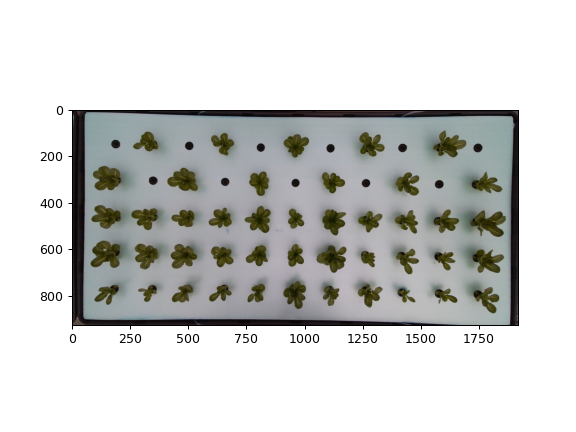

In [126]:
img = pcv.crop(img=raw_img, x=0, y=100, h=925, w=1950)
pcv.plot_image(img)
pcv.print_image(img,os.path.join(path_rgb, f'{img_name}.jpg'))

<IPython.core.display.Javascript object>


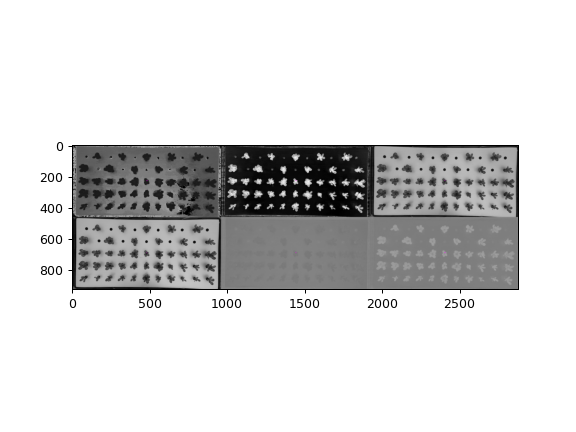

In [127]:
colorspace_img = pcv.visualize.colorspaces(rgb_img=img,original_img=False)
pcv.plot_image(colorspace_img)

<IPython.core.display.Javascript object>


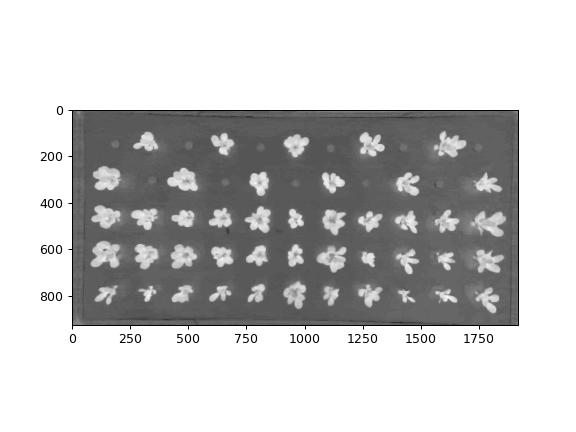

In [129]:
# hsv_h = pcv.rgb2gray_hsv(rgb_img=img, channel='h')
# hsv_s = pcv.rgb2gray_hsv(rgb_img=img, channel='s')
# hsv_v = pcv.rgb2gray_hsv(rgb_img=img, channel='v')
# lab_l = pcv.rgb2gray_lab(rgb_img=img, channel='l')
# lab_a = pcv.rgb2gray_lab(rgb_img=img, channel='a')
lab_b = pcv.rgb2gray_lab(rgb_img=img, channel='b')

pcv.plot_image(lab_b)

<IPython.core.display.Javascript object>


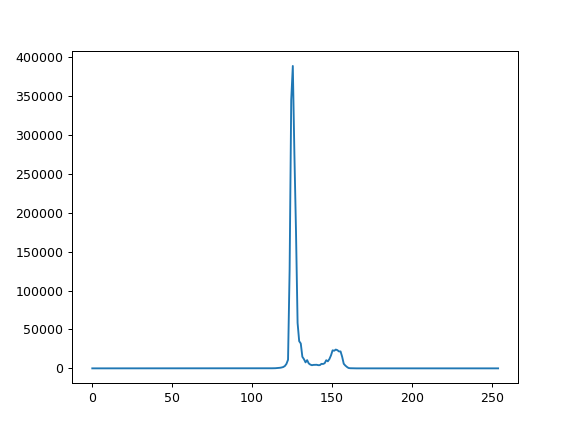

In [130]:
histogram, bin_edges = np.histogram(lab_b, bins=256, range=(0, 255))
fig, ax = plt.subplots()
plt.plot(bin_edges[0:-1], histogram)

<IPython.core.display.Javascript object>


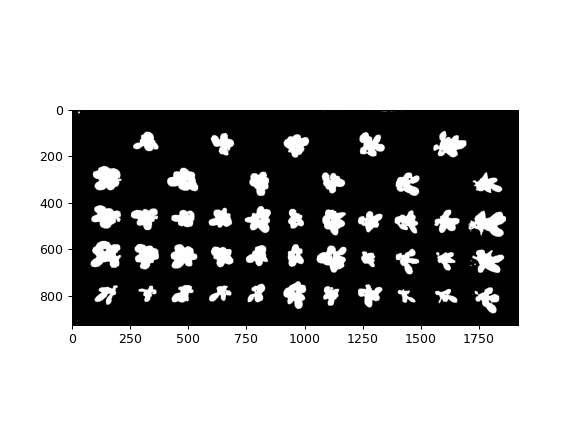

In [138]:
thresh = pcv.threshold.binary(gray_img=lab_b, threshold=135, max_value=255, object_type='light')
pcv.plot_image(thresh)

<IPython.core.display.Javascript object>


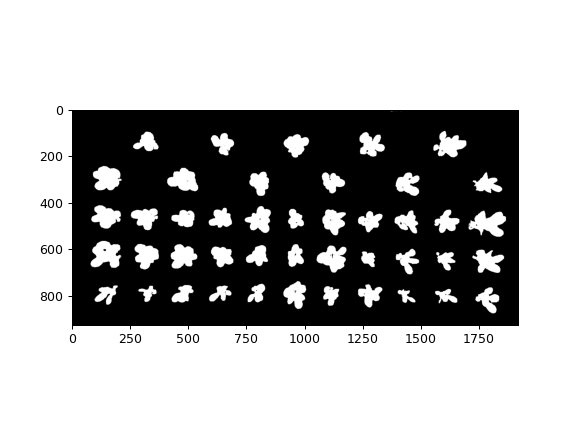

In [139]:
h_fill = pcv.fill(bin_img=thresh, size=500)
pcv.plot_image(h_fill)

In [140]:
pcv.print_image(h_fill,os.path.join(path_mask, f'{img_name}.jpg'))